# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from scipy.stats import shapiro
from scipy.stats import spearmanr

# Reading data

In [3]:
product_detail = pd.read_csv("../input-files/product_details.csv")
store_info = pd.read_csv("../input-files/store_info.csv")
supplier_info = pd.read_csv("../input-files/supplier_info.csv")
weather_data = pd.read_csv("../input-files/weather_data.csv")
weekly_sales = pd.read_csv("../input-files/weekly_sales.csv")

# Product Details

In [4]:
product_detail.head()

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID
0,1000,Whole Wheat Bread 800g,Bakery,4,4
1,1001,White Sandwich Loaf,Bakery,2,8
2,1002,Croissant 4-pack,Bakery,2,5
3,1003,Blueberry Muffins 6-pack,Bakery,4,10
4,1004,Chocolate Chip Cookies,Bakery,4,7


# Store Information

In [5]:
store_info.head()

,Store_ID,Region,Store_Size,Cold_Storage_Capacity
0,500,London,12000,3788
1,501,Midlands,5000,1086
2,502,North East,4000,998
3,503,Midlands,5000,1243
4,504,London,10000,3330


# Supplier Information

In [6]:
supplier_info.head()

,Supplier_ID,Supplier_Name,Lead_Time_Days,Supply_Capacity
0,1,FreshFoods UK Ltd.,1,68047
1,2,Quality Provisions Co.,2,35230
2,3,FarmDirect Suppliers Ltd.,2,71976
3,4,PremiumGoods Wholesale,3,48776
4,5,LocalHarvest Distributors,2,11306


# Weather Data

In [7]:
weather_data.head()

,Week_Number,Region,Avg_Temperature,Rainfall,Holiday_Flag
0,2024-W01,Midlands,7.4,32.1,0
1,2024-W01,South East,10.5,15.7,0
2,2024-W01,North West,6.8,28.5,1
3,2024-W01,London,9.9,23.0,1
4,2024-W01,South West,10.0,45.9,1


# Weekly Sales

In [8]:
weekly_sales.head()

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price
0,2024-W01,1000,500,4853,670.37,0,718,2.46
1,2024-W01,1001,500,4274,1089.62,0,641,1.27
2,2024-W01,1002,500,4215,1004.99,10,632,2.74
3,2024-W01,1003,500,5768,859.45,20,853,1.82
4,2024-W01,1004,500,3403,576.70,0,503,3.46


# Exploratory Data Analysis

In [9]:
def EDA_Stage_1(data, name):
  print("="*100)
  print(f"{name} dataset information")
  print(data.info())
  print("="*100)
  print(f"{name} dataset description")
  print(data.describe())
  print("="*100)
  print(f"{name} dataset shape")
  print(data.shape)
  print("="*100)
  print(f"{name} dataset columns")
  print(data.columns)
  print("="*100)
  print(f"{name} dataset null values")
  print(data.isna().sum())
  print("="*100)
  print(f"{name} dataset duplicate values")
  print(data.duplicated().sum())
  print("="*100)

In [10]:
EDA_Stage_1(product_detail, "Product details")

Product details dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product_ID        48 non-null     int64 
 1   Product_Name      48 non-null     object
 2   Product_Category  48 non-null     object
 3   Shelf_Life_Days   48 non-null     int64 
 4   Supplier_ID       48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB
None
Product details dataset description
       Product_ID  Shelf_Life_Days  Supplier_ID
count       48.00        48.000000    48.000000
mean      1023.50        59.916667     5.958333
std         14.00        99.226333     2.782608
min       1000.00         2.000000     1.000000
25%       1011.75         4.000000     4.000000
50%       1023.50         7.500000     6.000000
75%       1035.25        36.250000     8.000000
max       1047.00       356.000000    10.000000
Product details d

In [11]:
EDA_Stage_1(supplier_info, "Supplier Information")

Supplier Information dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Supplier_ID      10 non-null     int64 
 1   Supplier_Name    10 non-null     object
 2   Lead_Time_Days   10 non-null     int64 
 3   Supply_Capacity  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes
None
Supplier Information dataset description
       Supplier_ID  Lead_Time_Days  Supply_Capacity
count     10.00000       10.000000        10.000000
mean       5.50000        2.200000     48161.200000
std        3.02765        0.632456     18121.601841
min        1.00000        1.000000     11306.000000
25%        3.25000        2.000000     38162.250000
50%        5.50000        2.000000     51262.000000
75%        7.75000        2.750000     58185.500000
max       10.00000        3.000000     71976.000000
Supplier Informatio

In [12]:
EDA_Stage_1(store_info, "Store Information")

Store Information dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Store_ID               15 non-null     int64 
 1   Region                 15 non-null     object
 2   Store_Size             15 non-null     int64 
 3   Cold_Storage_Capacity  15 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 608.0+ bytes
None
Store Information dataset description
         Store_ID    Store_Size  Cold_Storage_Capacity
count   15.000000     15.000000              15.000000
mean   507.000000   5333.333333            1527.066667
std      4.472136   2894.987458             965.651628
min    500.000000   3000.000000             634.000000
25%    503.500000   3500.000000             999.500000
50%    507.000000   4000.000000            1086.000000
75%    510.500000   5000.000000            1509.500000
max    514.00000

In [13]:
EDA_Stage_1(weather_data, "Weather Data")

Weather Data dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_Number      364 non-null    object 
 1   Region           364 non-null    object 
 2   Avg_Temperature  364 non-null    float64
 3   Rainfall         364 non-null    float64
 4   Holiday_Flag     364 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 14.3+ KB
None
Weather Data dataset description
       Avg_Temperature    Rainfall  Holiday_Flag
count       364.000000  364.000000    364.000000
mean         10.015110   20.847253      0.148352
std           6.136098   10.459884      0.355937
min          -2.000000    6.600000      0.000000
25%           4.500000   12.550000      0.000000
50%           9.700000   18.600000      0.000000
75%          15.525000   27.825000      0.000000
max          22.000000   58.300000      1.000000

In [14]:
EDA_Stage_1(weekly_sales, "Weekly Sales")

Weekly Sales dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37440 entries, 0 to 37439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Week_Number       37440 non-null  object 
 1   Product_ID        37440 non-null  int64  
 2   Store_ID          37440 non-null  int64  
 3   Units_Sold        37440 non-null  int64  
 4   Marketing_Spend   37440 non-null  float64
 5   Discount_Percent  37440 non-null  int64  
 6   Wastage_Units     37440 non-null  int64  
 7   Price             37440 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.3+ MB
None
Weekly Sales dataset description
         Product_ID      Store_ID    Units_Sold  Marketing_Spend  \
count  37440.000000  37440.000000  37440.000000     37440.000000   
mean    1023.500000    507.000000   1642.154087       410.551195   
std       13.853584      4.320551   1166.477872       239.093420   
min     1000.0000

# Stage 2 EDA

## 1. Overall Business Performance

In [15]:
product_detail['Product_Category'].value_counts()

Product_Category
Bakery       12
Meat         12
Dairy        12
Beverages    12
Name: count, dtype: int64

In [16]:
print(f"We have a total number of {len(product_detail)} products in this store")
print(f"We have the total number of { len(product_detail['Product_Category'].value_counts())} product categories in this store.")

We have a total number of 48 products in this store
We have the total number of 4 product categories in this store.


In [17]:
print("The sales for 52 weeks is ", len(weekly_sales))
print(f"The total number of unit sold in {len(weather_data)} days is {weekly_sales['Units_Sold'].sum():,}")
print(f"The total number of units wasted/expired units in {len(weather_data)} days is {weekly_sales['Wastage_Units'].sum():,}")
print(f"The average number of units sold is {weekly_sales['Units_Sold'].mean():.2f}")
print(f"The average number of wasted units is {weekly_sales['Wastage_Units'].mean():.2f}")
print(f"The overall wastage rate is {weekly_sales['Wastage_Units'].sum() / weekly_sales['Units_Sold'].sum() * 100:.2f}%")

The sales for 52 weeks is  37440
The total number of unit sold in 364 days is 61,482,249
The total number of units wasted/expired units in 364 days is 4,786,490
The average number of units sold is 1642.15
The average number of wasted units is 127.84
The overall wastage rate is 7.79%


## 2. Category Performance

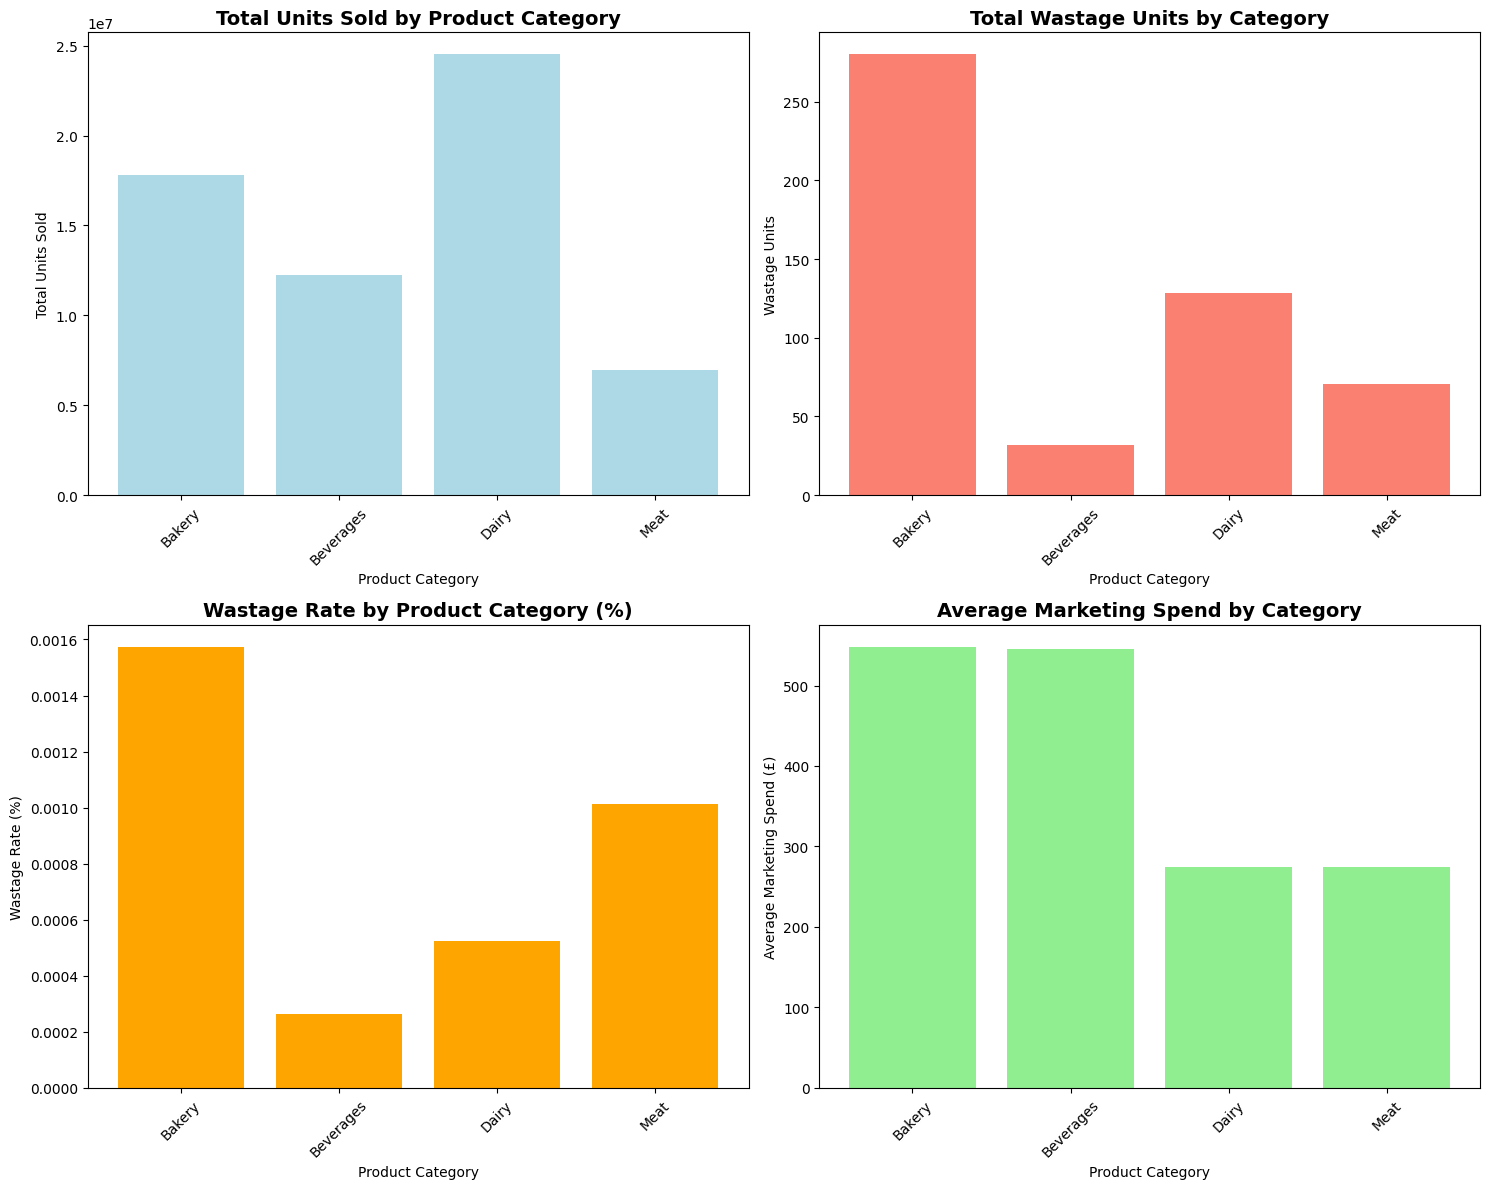

In [18]:
plt.figure(figsize=(15, 12))

# Merge Sales with Product Details
sales_with_categories = weekly_sales.merge(product_detail, on='Product_ID')

# Calculate metrics by category
category_metrics = sales_with_categories.groupby('Product_Category').agg({
    'Units_Sold': 'sum',
    'Price': 'mean',
    'Wastage_Units': 'mean',
    'Marketing_Spend': 'mean'
}).reset_index()

plt.subplot(2,2,1)
plt.bar(category_metrics['Product_Category'], category_metrics['Units_Sold'], color='lightblue')
plt.title('Total Units Sold by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)


plt.subplot(2,2,2)
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Units'], color='salmon')
plt.title('Total Wastage Units by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Units')
plt.xticks(rotation=45)

plt.subplot(2,2,3)
# Wastage Rate calculation
category_metrics['Wastage_Rate'] = category_metrics['Wastage_Units'] / category_metrics['Units_Sold'] * 100
plt.bar(category_metrics['Product_Category'], category_metrics['Wastage_Rate'], color='orange')
plt.title('Wastage Rate by Product Category (%)', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Wastage Rate (%)')
plt.xticks(rotation=45)


# Average marketing funds spent on each product category
plt.subplot(2,2,4)
plt.bar(category_metrics['Product_Category'], category_metrics['Marketing_Spend'], color='lightgreen')
plt.title('Average Marketing Spend by Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category')
plt.ylabel('Average Marketing Spend (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 3. Regional Performance

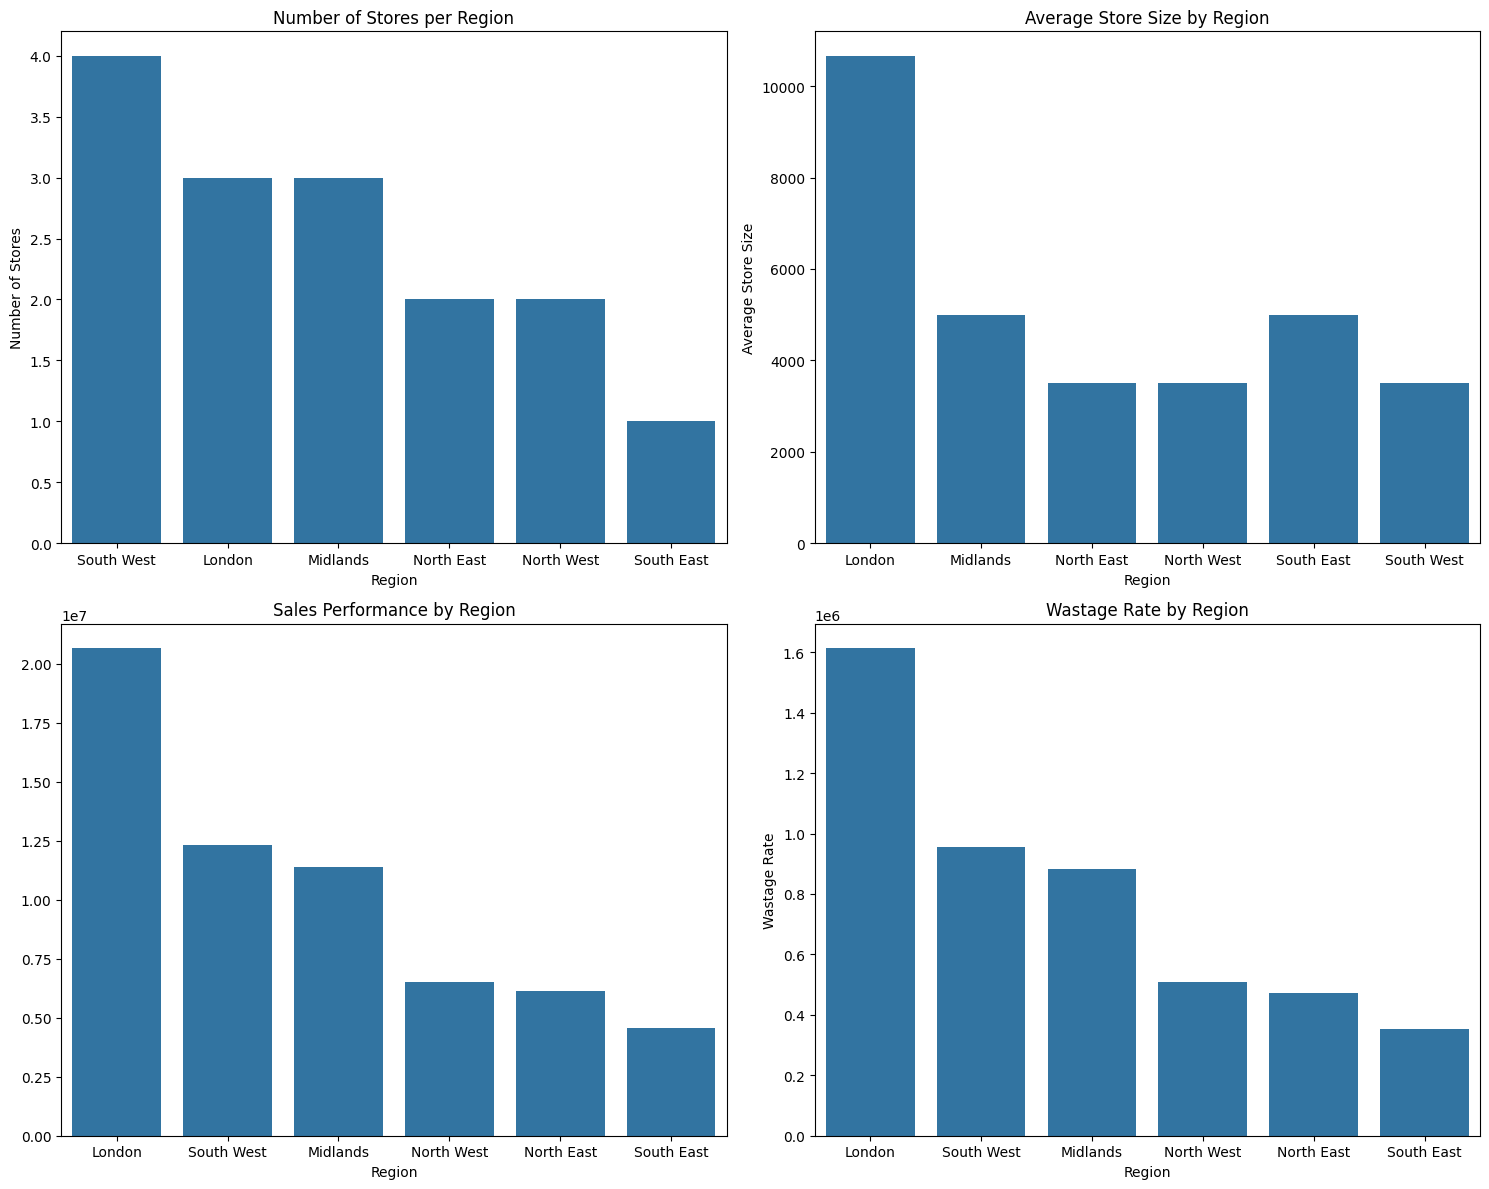

In [19]:
plt.figure(figsize=(15,12))

# Total number of Stores per region
plt.subplot(2, 2, 1)
region_store_counts = store_info['Region'].value_counts()
sns.barplot(x=region_store_counts.index, y=region_store_counts.values)
plt.title('Number of Stores per Region')
plt.xlabel('Region')
plt.ylabel('Number of Stores')

# Average Store Size per Region
plt.subplot(2, 2, 2)
store_size_by_region = store_info.groupby('Region')['Store_Size'].mean()
sns.barplot(x=store_size_by_region.index, y=store_size_by_region.values)
plt.title('Average Store Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Store Size')

# Sales Performance per Region
plt.subplot(2, 2, 3)
region_sales = weekly_sales.merge(store_info, on='Store_ID')
store_region_performance = region_sales.groupby('Region')['Units_Sold'].sum().sort_values(ascending=False)
sns.barplot(x=store_region_performance.index, y=store_region_performance.values)
plt.title('Sales Performance by Region')
plt.xlabel('Region')


# Wastage Rate per Region
plt.subplot(2, 2, 4)
goods_wastage_per_region =  region_sales.groupby('Region')['Wastage_Units'].sum().sort_values(ascending=False)
sns.barplot(x=goods_wastage_per_region.index, y=goods_wastage_per_region.values)
plt.title('Wastage Rate by Region')
plt.xlabel('Region')
plt.ylabel('Wastage Rate')

plt.tight_layout()
plt.show()

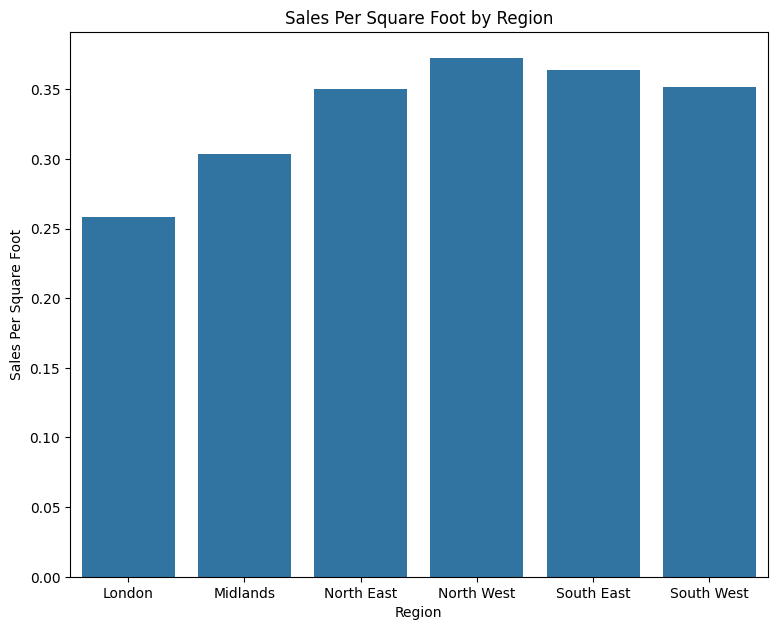

In [20]:
# Sales Per Square Foot
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
region_totals = region_sales.groupby('Region').agg({
    'Units_Sold': 'sum',
    'Store_Size': 'sum'
}).reset_index()

region_totals['Sales_Per_Square_Foot'] = region_totals['Units_Sold'] / region_totals['Store_Size']
sns.barplot(x=region_totals['Region'], y=region_totals['Sales_Per_Square_Foot'])
plt.title('Sales Per Square Foot by Region')
plt.xlabel('Region')
plt.ylabel('Sales Per Square Foot')

plt.tight_layout()
plt.show()

# 4. Pricing Strategy Analysis

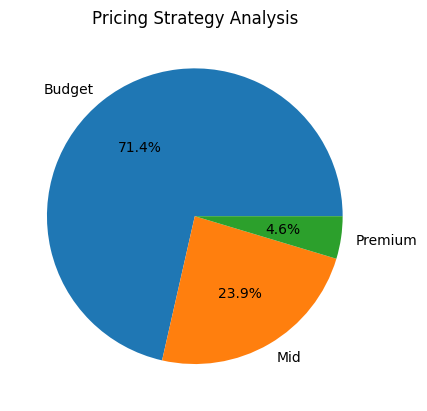

In [21]:
# Segment products into 3 price bands: budget (<5), mid (5-10), premium (>=10)
region_sales['Price_Band'] = pd.cut(region_sales['Price'], bins=[-np.inf, 5, 10, np.inf], labels=['Budget', 'Mid', 'Premium'])
plt.pie(region_sales['Price_Band'].value_counts(), labels=region_sales['Price_Band'].value_counts().index, autopct='%1.1f%%')
plt.title('Pricing Strategy Analysis')
plt.show()

## 5. Promotion Effectiveness (Discount Performance)

C:\Users\hilla.HILLARY\AppData\Local\Temp\ipykernel_10100\415526445.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])


([<matplotlib.axis.XTick at 0x294ba81a9b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '5'),
  Text(2, 0, '10'),
  Text(3, 0, '15'),
  Text(4, 0, '20'),
  Text(5, 0, '25')])

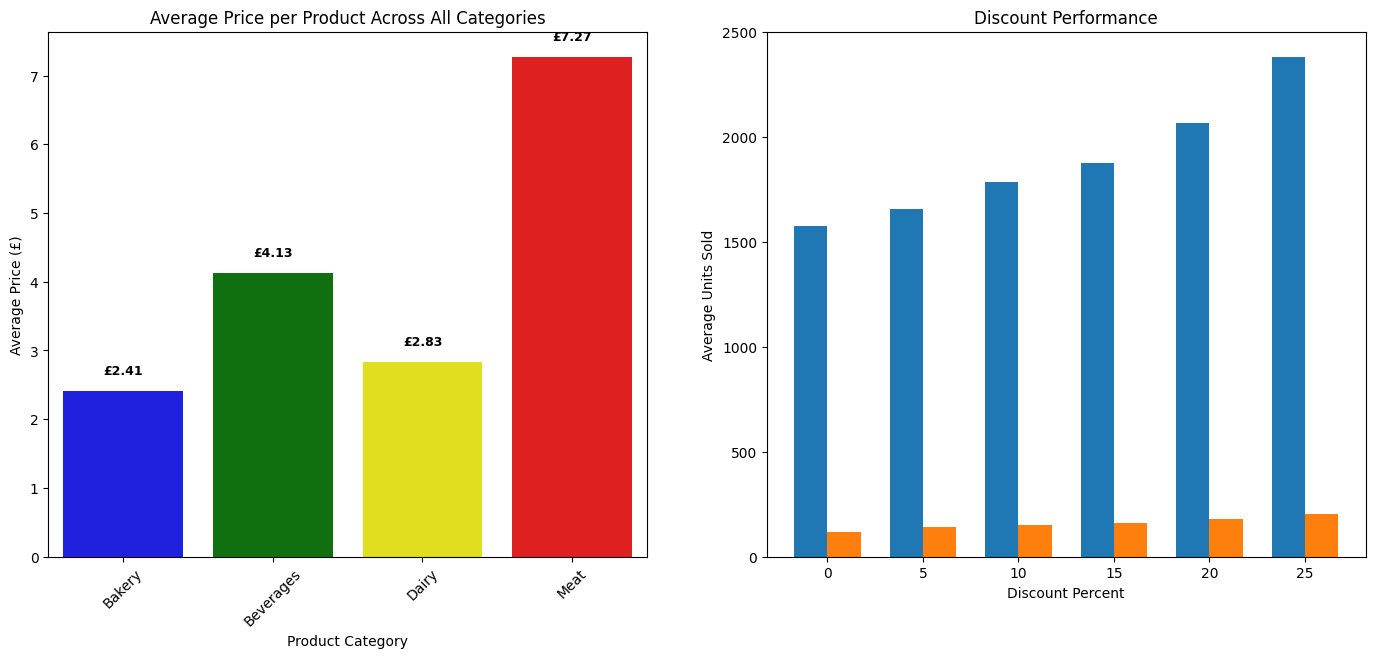

In [22]:
plt.figure(figsize=(17,15))

plt.subplot(2, 2, 1)
# Average Price per Product Across All Categories
category_price = weekly_sales.merge(product_detail, on='Product_ID')
price_per_product_category = category_price.groupby('Product_Category')['Price'].mean()
sns.barplot(x=price_per_product_category.index, y=price_per_product_category.values, palette=['blue', 'green', 'yellow', 'red'])
plt.title('Average Price per Product Across All Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)

for i, (cat, val) in enumerate(zip(price_per_product_category.index, price_per_product_category.values)):
    plt.text(i, val + 0.2, f'£{val:.2f}', ha='center', va='bottom', fontweight="bold", fontsize=9)


# Discount Performance
# We are trying to ge how the sales perform by each discount percentage
# in this plot we used aggregation, why is the aggregate used
plt.subplot(2, 2, 2)
discount_performance = weekly_sales.groupby('Discount_Percent').agg({
    'Units_Sold': 'mean',
    'Wastage_Units': 'mean'
}).reset_index()

x = np.arange(len(discount_performance))
width = 0.35

bars1 = plt.bar(x - width/2, discount_performance['Units_Sold'], width, label='Units Sold')
bars2 = plt.bar(x + width/2, discount_performance['Wastage_Units'], width, label='Wastage Units')

plt.title('Discount Performance')
plt.xlabel('Discount Percent')
plt.ylabel('Average Units Sold')
plt.xticks(x, discount_performance['Discount_Percent'])

In [23]:
# Compare sales at the best discount vs. no discount, and calculate the percentage sales lift
discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 25]
no_discount_sales = weekly_sales[weekly_sales['Discount_Percent'] == 0]

discount_units_sold = discount_sales['Units_Sold'].sum()
no_discount_units_sold = no_discount_sales['Units_Sold'].sum()

# Calculate percentage lift
sales_lift = ((discount_units_sold - no_discount_units_sold) / no_discount_units_sold) * 100

print(f"Units Sold with 25% Discount: {discount_units_sold}")
print(f"Units Sold with No Discount: {no_discount_units_sold}")
print(f"Sales Lift at 25% Discount: {sales_lift:.2f}%")

Units Sold with 25% Discount: 2060812
Units Sold with No Discount: 45269818
Sales Lift at 25% Discount: -95.45%


## 6. Marketing Spend Effectiveness 

### Correlation between marketing spend and sales

H0: There is no difference between the distribution of Marketing Spend with that of a normal distribution.

H1: There is a difference between the distribution of Marketing Spend with that of a normal distribution.

In [24]:
# Perform Shapiro-Wilk test
marketing_spend_statistic, marketing_spend_p_value = shapiro(category_metrics["Marketing_Spend"])

print(f"Marketing Spend Shapiro-Wilk Statistic: {marketing_spend_statistic:.4f}")
print(f"Marketing Spend P-value: {marketing_spend_p_value:.4f}")


Marketing Spend Shapiro-Wilk Statistic: 0.7331
Marketing Spend P-value: 0.0265


Looking at the p-value, which is less than the significant 5%(0.05), the null hypothesis is rejected, therefore this suggests that there is sufficient evidence to suggest that there is a difference between Marketing Spend and that of a normal distribution.

H0: There is no difference between the distribution of Units Sold with that of a normal distribution.

H1: There is a difference between the distribution of Units Sold with that of a normal distribution.

In [25]:
# Perform Shapiro-Wilk test
units_sold_statistic, units_sold_p_value = shapiro(category_metrics["Units_Sold"])

print(f"Units Sold Shapiro-Wilk Statistic: {units_sold_statistic:.4f}")
print(f"Units Sold P-value: {units_sold_p_value:.4f}")

Units Sold Shapiro-Wilk Statistic: 0.9921
Units Sold P-value: 0.9679


Looking at the p-value which is greater than the significant 5% (0.05) the null hypothesis is accepted and there is enough evidence to suggest that there is no difference between the units sold and that of a normal distribution.

Identifying that the Unit_Sold variable is normally distributed while the Marketing Spend is not, therefore I will proceed with the Spearman Correlation Co-efficient.

H0: There is no linear relationship between Marketing_Spend and Units_Sold.

H1: There is a linear relationship between Marketing_Spend and Units_Sold.

In [26]:
# Perform Spearman Correlation Co-efficient between Marketing_Spend and Units_Sold

correlation, pvalue = spearmanr(category_metrics['Marketing_Spend'], category_metrics['Units_Sold'])

print(f"Spearman Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {pvalue:.4f}")

Spearman Correlation Coefficient: 0.4000
P-value: 0.6000


Looking at the p-value, which is more than the significant 5% (0.05), it is clear that the null hypothesis should not be rejected. There is sufficient evidence to suggest than there is no linear relationship between Marketing Spend Units and Units Sold.

In [27]:
# Average marketing cost per unit sold
print(f"The average marketing cost per unit sold is £{category_metrics['Marketing_Spend'].mean():.2f}")

The average marketing cost per unit sold is £410.55


## 7. Product Perfomance

In [28]:
# Top 5 best selling products
print("Top 5 best selling products")

top_5_best_selling_products = category_price.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(5)
print(top_5_best_selling_products)
print('='*100)

# Get Product Names of the best selling products
top_5_best_selling_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_selling_products.index), 'Product_Name']
print(top_5_best_selling_products_names)

Top 5 best selling products
Product_ID
1031    2093430
1030    2070145
1033    2053001
1029    2049192
1034    2046517
Name: Units_Sold, dtype: int64
29    Free Range Eggs 12-pack
30        Cottage Cheese 300g
31            Mozzarella 250g
33         Single Cream 300ml
34       Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


In [29]:
# Generate revenue variable Price * (1-discount/100) * Units Sold
category_price['Revenue'] = category_price['Price'] * category_price['Units_Sold'] - category_price['Marketing_Spend']

In [30]:
# Identify top 5 revenue generating products
top_5_best_revenue_generating_products = category_price.groupby('Product_ID')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 best revenue generating products")
print(top_5_best_revenue_generating_products)
print('='*100)

# Get Product Names of the best revenue generating products
top_5_best_revenue_generating_products = product_detail.loc[product_detail['Product_ID'].isin(top_5_best_revenue_generating_products.index), 'Product_Name']
print(top_5_best_revenue_generating_products)


Top 5 best revenue generating products
Product_ID
1031    5711926.03
1034    5568411.50
1028    5555663.81
1024    5550544.18
1025    5543777.32
Name: Revenue, dtype: float64
24           Whole Milk 4-pint
25    Semi-Skimmed Milk 4-pint
28                 Butter 250g
31             Mozzarella 250g
34        Yogurt Drinks 6-pack
Name: Product_Name, dtype: object


In [31]:
# Top 5 highest-wastage products with >1000 units sold
top_5_highest_wastage_products = category_price[category_price['Units_Sold'] > 1000].groupby('Product_ID')['Wastage_Units'].sum().sort_values(ascending=False).head(5)
print("Top 5 highest-wastage products with >1000 units sold")
print(top_5_highest_wastage_products)
print('='*100)

# Get Product Names of the highest wastage products
top_5_highest_wastage_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_highest_wastage_products.index), 'Product_Name']
print(top_5_highest_wastage_products_names)

Top 5 highest-wastage products with >1000 units sold
Product_ID
1001    218163
1002    215441
1011    215044
1009    211380
1006    207928
Name: Wastage_Units, dtype: int64
1       White Sandwich Loaf
2          Croissant 4-pack
6     Cinnamon Rolls 4-pack
9         Banana Bread Loaf
11            Donuts 8-pack
Name: Product_Name, dtype: object


In [32]:
# Top 5 highest-wastage products with >1000 units sold
top_5_highest_wastage_products = category_price[category_price['Units_Sold'] > 1000].groupby('Product_ID')['Wastage_Units'].sum().sort_values(ascending=False).head(5)
print("Top 5 highest-wastage products with >1000 units sold")
print(top_5_highest_wastage_products)
print('='*100)

# Get Product Names of the highest wastage products
top_5_highest_wastage_products_names = product_detail.loc[product_detail['Product_ID'].isin(top_5_highest_wastage_products.index), 'Product_Name']
print(top_5_highest_wastage_products_names)

Top 5 highest-wastage products with >1000 units sold
Product_ID
1001    218163
1002    215441
1011    215044
1009    211380
1006    207928
Name: Wastage_Units, dtype: int64
1       White Sandwich Loaf
2          Croissant 4-pack
6     Cinnamon Rolls 4-pack
9         Banana Bread Loaf
11            Donuts 8-pack
Name: Product_Name, dtype: object


## 8. Seasonal Trends

In [33]:
category_price

,Week_Number,Product_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Revenue
0,2024-W01,1000,500,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4,11268.01
1,2024-W01,1001,500,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8,4338.36
2,2024-W01,1002,500,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5,10544.11
3,2024-W01,1003,500,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10,9638.31
4,2024-W01,1004,500,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7,11197.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,2024-W52,1043,514,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9,960.93
37436,2024-W52,1044,514,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1,7210.14
37437,2024-W52,1045,514,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9,5237.40
37438,2024-W52,1046,514,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8,6779.24


In [ ]:
# Convert the Week_Number to a proper datetime
category_price["week_start"] = pd.to_datetime(category_price["Week_Number"].astype('str') + "-1", format="%G-W%V-%u")

# Extract month as Year Month
category_price["month"] = category_price["week_start"].dt.to_period("M").astype(str)

# Ensure numeric columns are numeric
numeric_columns = category_price.select_dtypes(include=['number']).columns
category_price[numeric_columns] = category_price[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Aggregate
monthly_sales = category_price.groupby("month").agg({
    "Units_Sold": "sum",
    "Marketing_Spend": "sum",
    "Discount_Percent": "mean",
    "Wastage_Units": "sum",
    "Price": "mean",
    "Revenue": "sum" }).reset_index()

monthly_sales

0        2024-01
1        2024-01
2        2024-01
3        2024-01
4        2024-01
          ...   
37435    2024-12
37436    2024-12
37437    2024-12
37438    2024-12
37439    2024-12
Name: month, Length: 37440, dtype: object


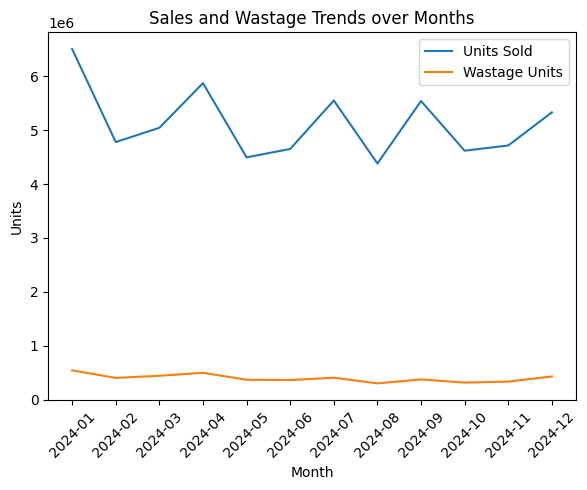

In [33]:
# Sort months chronologically (important for line plot)
monthly_sales = monthly_sales.sort_values("month")

# Line plot of sales and wastage trends over months
plt.figure(figsize=(6,5))
sns.lineplot(x="month", y="Units_Sold", data=monthly_sales, label="Units Sold")
sns.lineplot(x="month", y="Wastage_Units", data=monthly_sales, label="Wastage Units")
plt.title("Sales and Wastage Trends over Months")
plt.xlabel("Month")
plt.ylabel("Units")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Best Sales Month
print(f"The best sales month is {monthly_sales.loc[monthly_sales['Revenue'].idxmax(), 'month']}")

The best sales month is 2024-01


In [35]:
# Month with the highest wastage
print(f"The month with the highest wastage is {monthly_sales.loc[monthly_sales['Wastage_Units'].idxmax(), 'month']}")

The month with the highest wastage is 2024-01


In [36]:
# Most Efficient marketing month
print(f"The most efficient marketing month is {monthly_sales.loc[monthly_sales['Marketing_Spend'].idxmin(), 'month']}")

The most efficient marketing month is 2024-05


## 9. Shelf Life Capacity

## Is there a correlation between Shelf life and Wastage?

H0: There is no difference between the distribution of Shelf_Life_Days with that of a normal distribution.

H1: There is a difference between the distribution of Shelf_Life_Days with that of a normal distribution

In [37]:
# Perform Shapiro-Wilk test
Shelf_Life_Days_statistic, Shelf_Life_Days_p_value = shapiro(category_price["Shelf_Life_Days"])

print(f"Shelf_Life_Days Amount Shapiro-Wilk Statistic: {Shelf_Life_Days_statistic:.4f}")
print(f"Shelf_Life_Days P-value: {Shelf_Life_Days_p_value:.4f}")

Shelf_Life_Days Amount Shapiro-Wilk Statistic: 0.6187
Shelf_Life_Days P-value: 0.0000


c:\Users\hilla.HILLARY\OneDrive\Documents\Desktop\Amdari\Predictive Modelling for Perishable Goods\Code\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37440.
  res = hypotest_fun_out(*samples, **kwds)


Looking at the p-value, which is less than the significant (5%), which is enough evidence to prove that the null hypothesis should be rejected and that there is a difference between the distribution of Shelf_Life_Days with that of a normal distribution.

H0: There is no difference between the distribution of Wastage_Units with that of a normal distribution.

H1: There is a difference between the distribution of Wastage_Units with that of a normal distribution

In [38]:
# Perform Shapiro-Wilk test
Wastage_Units_statistic, Wastage_Units_p_value = shapiro(category_price["Wastage_Units"])

print(f"Wastage Units Shapiro-Wilk Statistic: {Wastage_Units_statistic:.4f}")
print(f"Wastage Units P-value: {Wastage_Units_p_value:.4f}")

Wastage Units Shapiro-Wilk Statistic: 0.7527
Wastage Units P-value: 0.0000


Looking at the p-value, which is less than the significant (5%), which is enough evidence to prove that the null hypothesis should be rejected and that there is a difference between the distribution of Wastage_Units with that of a normal distribution.

Knowing that both variables (Shelf_Life_Days and Wastage_Units) are not normally distributed, I will proceed with the Spearman Correlation Co-efficient.

H0: There is no linear relationship between Shelf_Life_Days and Wastage_Units.

H1: There is a linear relationship between Shelf_Life_Days and Wastage_Units.

In [39]:
# Perform Spearman Correlation Co-efficient between Total Purchases and Total Amount
correlation, pvalue = spearmanr(category_price['Shelf_Life_Days'], category_price['Wastage_Units'])

print(f"Spearman Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {pvalue:.4f}")

Spearman Correlation Coefficient: -0.6308
P-value: 0.0000


Looking at the p-value, which is less than the significant 5% (0.05), it is clear that the null hypothesis should be rejected. There is sufficient evidence to suggest that there is a linear relationship between Shelf_Life_Days and Wastage_Unitst. The correlation coefficient, which is -0.63, indicates that there is a strong negative association between Shelf_Life_Days and Wastage_Units.

In [40]:
# Category with the shortest shelf life
print(f"The category with the shortest shelf life is {category_price.loc[category_price['Shelf_Life_Days'].idxmin(), 'Product_Category']}")
# Category with the longest shelf life
print(f"The category with the longest shelf life is {category_price.loc[category_price['Shelf_Life_Days'].idxmax(), 'Product_Category']}")
# Categorty with highest wastage linked to shelf life
print(f"The category with the highest wastage linked to shelf life is {category_price.loc[category_price['Wastage_Units'].idxmax(), 'Product_Category']}")

The category with the shortest shelf life is Bakery
The category with the longest shelf life is Beverages
The category with the highest wastage linked to shelf life is Bakery


## 10. Store Efficiency Analysis

In [41]:
store_category_price = store_info.merge(category_price, on='Store_ID')
store_category_price

,Store_ID,Region,Store_Size,Cold_Storage_Capacity,Week_Number,Product_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,Price,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Revenue,week_start,month
0,500,London,12000,3788,2024-W01,1000,4853,670.37,0,718,2.46,Whole Wheat Bread 800g,Bakery,4,4,11268.01,2024-01-01,2024-01
1,500,London,12000,3788,2024-W01,1001,4274,1089.62,0,641,1.27,White Sandwich Loaf,Bakery,2,8,4338.36,2024-01-01,2024-01
2,500,London,12000,3788,2024-W01,1002,4215,1004.99,10,632,2.74,Croissant 4-pack,Bakery,2,5,10544.11,2024-01-01,2024-01
3,500,London,12000,3788,2024-W01,1003,5768,859.45,20,853,1.82,Blueberry Muffins 6-pack,Bakery,4,10,9638.31,2024-01-01,2024-01
4,500,London,12000,3788,2024-W01,1004,3403,576.70,0,503,3.46,Chocolate Chip Cookies,Bakery,4,7,11197.68,2024-01-01,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,514,South West,3000,1001,2024-W52,1043,895,488.97,15,22,1.62,English Breakfast Tea 80bags,Beverages,246,9,960.93,2024-12-23,2024-12
37436,514,South West,3000,1001,2024-W52,1044,1558,657.76,10,38,5.05,Sparkling Water 1L,Beverages,186,1,7210.14,2024-12-23,2024-12
37437,514,South West,3000,1001,2024-W52,1045,993,442.56,0,24,5.72,Lemonade 2L,Beverages,356,9,5237.40,2024-12-23,2024-12
37438,514,South West,3000,1001,2024-W52,1046,2168,1502.52,25,54,3.82,Protein Shake 4-pack,Beverages,158,8,6779.24,2024-12-23,2024-12


In [42]:
# Best Perfoming store (highest units sold)
print(f"The best performing store is {store_category_price.loc[store_category_price['Units_Sold'].idxmax(), 'Store_ID']}")
print(f"The best performing store is located in {store_category_price.loc[store_category_price['Units_Sold'].idxmax(), 'Region']}")

# Lowest wastage store
print(f"The lowest wastage store is {store_category_price.loc[store_category_price['Wastage_Units'].idxmin(), 'Store_ID']}")
print(f"The lowest wastage store is located in {store_category_price.loc[store_category_price['Wastage_Units'].idxmin(), 'Region']}")

The best performing store is 500
The best performing store is located in London
The lowest wastage store is 506
The lowest wastage store is located in South West
